<a href="https://colab.research.google.com/github/mukheshbabu/machine-learning/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [21]:
bank_data = pd.read_csv('bank-additional-full.csv')
bank_data.head()

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,no,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,unknown,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,no,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,no,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,no,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
bank_data['default'] = bank_data['default'].map({'no': 0,'yes': 1,'unknown': 0})
bank_data['y'] = bank_data['y'].map({'no': 0,'yes': 1})

In [23]:
### Splitting the Data

# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

print(X)
print(y)

# Spli the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

       age  default  duration  campaign  pdays  previous  emp.var.rate  \
0       56        0       261         1    999         0           1.1   
1       57        0       149         1    999         0           1.1   
2       37        0       226         1    999         0           1.1   
3       40        0       151         1    999         0           1.1   
4       56        0       307         1    999         0           1.1   
...    ...      ...       ...       ...    ...       ...           ...   
41183   73        0       334         1    999         0          -1.1   
41184   46        0       383         1    999         0          -1.1   
41185   56        0       189         2    999         0          -1.1   
41186   44        0       442         1    999         0          -1.1   
41187   74        0       239         3    999         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0              93.994          -36.4      4.857 

In [24]:
### Fitting and Evaluating the Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [28]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Training Data Accuracy:", accuracy_train)
print("Testing Data Accuracy:", accuracy_test)

Training Data Accuracy: 0.9998482549317147
Testing Data Accuracy: 0.91854819130857


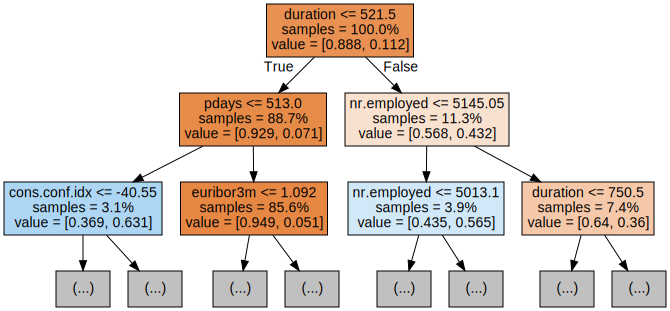

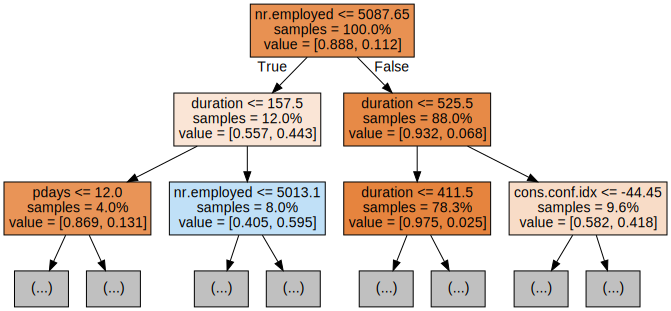

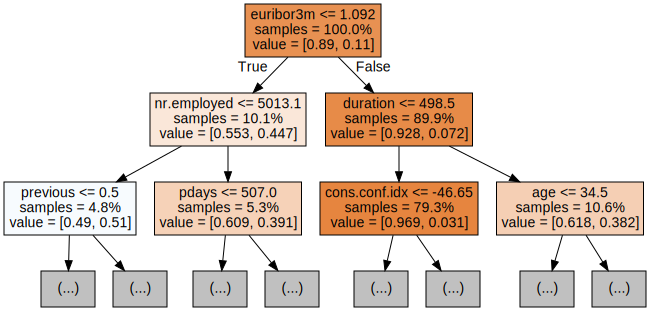

In [29]:
### Visualizing the Results

for i in range(3):
  tree = rf.estimators_[i]
  dot_data = export_graphviz(tree, feature_names=X_train.columns, filled=True, max_depth=2, impurity=False, proportion=True)
  graph = graphviz.Source(dot_data)
  display(graph)

In [36]:
### Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter = 5, cv = 5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce6420e4a10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce641c196d0>})

In [37]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 80}


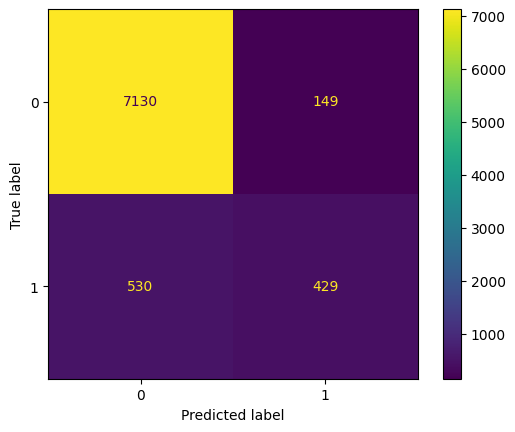

In [38]:
### More Random Forest Evaluation Metrics

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [41]:
### Evaluate the best model with accuracy, precision, and recall (note your results may differ due to randomization)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)

Accuracy: 0.9078659868900218
Precision: 0.6373626373626373
Recall 0.48383733055265904


<Axes: >

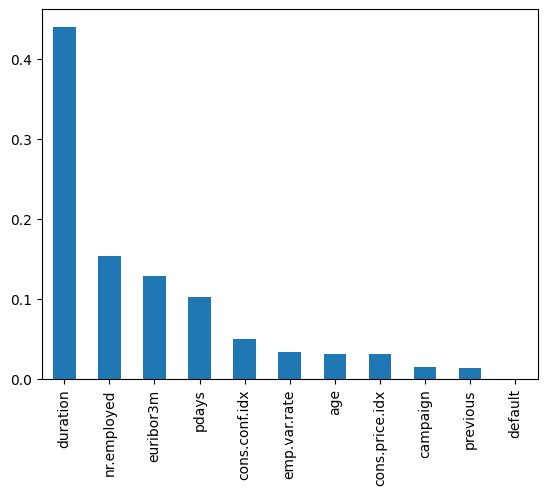

In [43]:
### Plot the importance of each feature importances from the model and feature names from the training data

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()